<a href="https://colab.research.google.com/github/skarot/MachineLearning/blob/main/KNNClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification

## K Nearest Neighbour - KNN

### Import libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Load data

In [2]:
%cd ..

/


In [3]:
cd /tmp

/tmp


In [15]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv \
-P /tmp/

--2022-04-19 14:30:35--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36047 (35K) [text/csv]
Saving to: ‘/tmp/teleCust1000t.csv’

teleCust1000t.csv   100%[===================>]  35.20K  --.-KB/s    in 0.02s   

2022-04-19 14:30:35 (1.70 MB/s) - ‘/tmp/teleCust1000t.csv’ saved [36047/36047]



In [16]:
df = pd.read_csv('/tmp/teleCust1000t.csv')
df.head(5)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


### EDA

In [17]:
df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [20]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc6698ec350>,
      dtype=object)

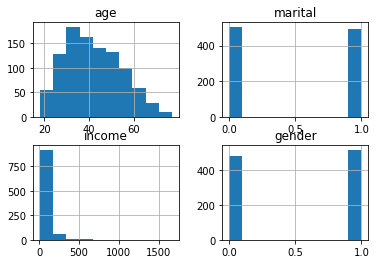

In [21]:
viz = df[['age','marital','income','gender']]
viz.hist()

In [22]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

### Feature Set

Feature set :X
Convert pandas dataframe to numpy array

In [29]:
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed','employ', 'retire', 'gender', 'reside']] .values

In [30]:
y = df['custcat']. values

### Normalise data

In [ ]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

### Train Test split


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


### Classification

In [37]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
cl = KNeighborsClassifier(n_neighbors = k)
cl.fit(X_train,y_train)
cl

KNeighborsClassifier(n_neighbors=4)

### Prediction

In [38]:
yhat = cl.predict(X_test)
yhat[0:5]

array([3, 1, 3, 4, 4])

### Model evaluation

In [41]:
from sklearn.metrics import accuracy_score
print("Train Accuracy score %f" % accuracy_score(y_train, cl.predict(X_train)))
print("Test Accuracy score %f" % accuracy_score(y_test,yhat))

Train Accuracy score 0.558750
Test Accuracy score 0.260000


### Plot for various values of k


In [48]:
kn = 10
mean_acc = np.zeros((kn-1))
for k in range(1,kn):
  neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
  yhat = neigh.predict(X_test)
  mean_acc[k-1] = accuracy_score(y_test, yhat)
mean_acc

array([0.275, 0.31 , 0.275, 0.26 , 0.3  , 0.29 , 0.345, 0.325, 0.32 ])

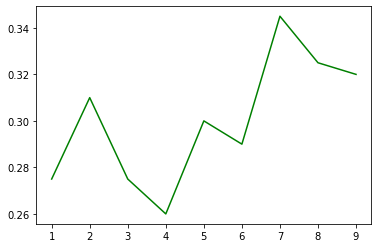

In [50]:
plt.plot(np.arange(1,kn),mean_acc,'g')